In [7]:
import os
import math
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
cwd = os.getcwd()
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from IPython.display import display
from matplotlib.lines import Line2D
pd.options.display.max_columns = None

In [3]:
plt.style.use(['science'])
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
os.chdir(os.path.join(cwd,'../../..'))
import ExMAS.main
import ExMAS.utils
from ExMAS.utils import inData as inData
from ExMAS.main import matching

In [54]:
EXPERIMENT_NAME = 'res400_5'
KPIs = pd.read_csv('ExMAS/extras/game_results/{}_KPIs.csv'.format(EXPERIMENT_NAME), index_col = 0)
rides = pd.read_csv('ExMAS/extras/game_results/{}_rides.csv'.format(EXPERIMENT_NAME), index_col = 0)
rm = pd.read_csv('ExMAS/extras/game_results/{}_rm.csv'.format(EXPERIMENT_NAME), index_col = [0,1])
rides.shape

(2191, 118)

In [55]:
col = 'indexes'
rides[col] = rides[col].apply(lambda x: json.loads(x))
rides['indexes_set'] = rides.indexes.apply(set)

In [59]:
def givedisjoints(row):
    # returns list of all the subgroup indiced contained in a ride
    return rides[rides.indexes_set.apply(lambda x: x.isdisjoint(row.indexes_set))].shape[0]
def giveintersecting(row):
    # returns list of all the subgroup indiced contained in a ride
    return rides[rides.indexes_set.apply(lambda x: bool( x & row.indexes_set))].shape[0]
rides['disjoints'] = rides.apply(givedisjoints, axis=1)
#rides['intersecting'] = rides.apply(giveintersecting, axis=1)

In [67]:
df = pd.Series([rides.shape[0], (rides.shape[0]**2)/2, rides['disjoints'].sum()/2,  rides['intersecting'].sum()/2]).to_frame().T
df.columns = ['groups', 'pairs', 'disjoint pairs', 'intersecting pairs']
df.T
print(df.T)

                            0
groups                 2191.0
pairs               2400240.5
disjoint pairs      2346489.0
intersecting pairs    53751.5


In [ ]:
def givedisjoints(row):
    # returns list of all the subgroup indiced contained in a ride
    return rides[rides.indexes_set.apply(lambda x: x.isdisjoint(row.indexes_set))].shape[0]
rides['n_intersecting'] = rides.apply(givedisjoints, axis=1)

In [23]:
r1 = rides.sample(1).iloc[0]
r2 = rides.sample(1).iloc[0]
r1.indexes, r2.indexes

([144, 113, 317], [280])

In [6]:
PRICINGS = ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']

for i,PRICING in enumerate(PRICINGS):
    
    for j, ALGO in enumerate(['EXMAS', 'TNE', 'HERMETIC', 'RUE', 'RSIE', 'TSE']):
        col_name = "pruned_Pricing-{}_Pruning-['{}']".format(PRICING, ALGO)
        rm[col_name] = rm.apply(lambda r: rides.loc[r.ride][col_name], axis = 1)

In [7]:
del rides['row'] 
rides.sample(5)

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,lambda_r,PassHourTrav_ns,selected,treqs,deps,delays,ttravs,pruned,indexes_set,subgroups,supergroups,rankings,mean_ranking,rel_rankings,mean_rel_ranking,PoAs,mean_PoA,total_PoA,squared_PoA,probs,min_prob,logsum_prob,costs_user,costs_veh,costs_total,total_group_cost,cost_efficiency,total_singles,residual,total_price_subgroup,SUBGROUP,UNIFORM,EXTERNALITY,RESIDUAL,pruned_Pricing-SUBGROUP_Pruning-['EXMAS'],Experiment-res400b_2_Pricing-SUBGROUP_Objective-['total_group_cost']_Pruning-['EXMAS']_minmax-min,Experiment-res400b_2_Pricing-SUBGROUP_Objective-['total_group_cost']_Pruning-['EXMAS']_minmax-max,pruned_Pricing-SUBGROUP_Pruning-['TNE'],Experiment-res400b_2_Pricing-SUBGROUP_Objective-['total_group_cost']_Pruning-['TNE']_minmax-min,Experiment-res400b_2_Pricing-SUBGROUP_Objective-['total_group_cost']_Pruning-['TNE']_minmax-max,pruned_Pricing-SUBGROUP_Pruning-['HERMETIC'],Experiment-res400b_2_Pricing-SUBGROUP_Objective-['total_group_cost']_Pruning-['HERMETIC']_minmax-min,Experiment-res400b_2_Pricing-SUBGROUP_Objective-['total_group_cost']_Pruning-['HERMETIC']_minmax-max,pruned_Pricing-SUBGROUP_Pruning-['RUE'],Experiment-res400b_2_Pricing-SUBGROUP_Objective-['total_group_cost']_Pruning-['RUE']_minmax-min,Experiment-res400b_2_Pricing-SUBGROUP_Objective-['total_group_cost']_Pruning-['RUE']_minmax-max,pruned_Pricing-SUBGROUP_Pruning-['RSIE'],Experiment-res400b_2_Pricing-SUBGROUP_Objective-['total_group_cost']_Pruning-['RSIE']_minmax-min,Experiment-res400b_2_Pricing-SUBGROUP_Objective-['total_group_cost']_Pruning-['RSIE']_minmax-max,pruned_Pricing-SUBGROUP_Pruning-['TSE'],Experiment-res400b_2_Pricing-SUBGROUP_Objective-['total_group_cost']_Pruning-['TSE']_minmax-min,Experiment-res400b_2_Pricing-SUBGROUP_Objective-['total_group_cost']_Pruning-['TSE']_minmax-max,pruned_Pricing-UNIFORM_Pruning-['EXMAS'],Experiment-res400b_2_Pricing-UNIFORM_Objective-['total_group_cost']_Pruning-['EXMAS']_minmax-min,Experiment-res400b_2_Pricing-UNIFORM_Objective-['total_group_cost']_Pruning-['EXMAS']_minmax-max,pruned_Pricing-UNIFORM_Pruning-['TNE'],Experiment-res400b_2_Pricing-UNIFORM_Objective-['total_group_cost']_Pruning-['TNE']_minmax-min,Experiment-res400b_2_Pricing-UNIFORM_Objective-['total_group_cost']_Pruning-['TNE']_minmax-max,pruned_Pricing-UNIFORM_Pruning-['HERMETIC'],Experiment-res400b_2_Pricing-UNIFORM_Objective-['total_group_cost']_Pruning-['HERMETIC']_minmax-min,Experiment-res400b_2_Pricing-UNIFORM_Objective-['total_group_cost']_Pruning-['HERMETIC']_minmax-max,pruned_Pricing-UNIFORM_Pruning-['RUE'],Experiment-res400b_2_Pricing-UNIFORM_Objective-['total_group_cost']_Pruning-['RUE']_minmax-min,Experiment-res400b_2_Pricing-UNIFORM_Objective-['total_group_cost']_Pruning-['RUE']_minmax-max,pruned_Pricing-UNIFORM_Pruning-['RSIE'],Experiment-res400b_2_Pricing-UNIFORM_Objective-['total_group_cost']_Pruning-['RSIE']_minmax-min,Experiment-res400b_2_Pricing-UNIFORM_Objective-['total_group_cost']_Pruning-['RSIE']_minmax-max,pruned_Pricing-UNIFORM_Pruning-['TSE'],Experiment-res400b_2_Pricing-UNIFORM_Objective-['total_group_cost']_Pruning-['TSE']_minmax-min,Experiment-res400b_2_Pricing-UNIFORM_Objective-['total_group_cost']_Pruning-['TSE']_minmax-max,pruned_Pricing-EXTERNALITY_Pruning-['EXMAS'],Experiment-res400b_2_Pricing-EXTERNALITY_Objective-['total_group_cost']_Pruning-['EXMAS']_minmax-min,Experiment-res400b_2_Pricing-EXTERNALITY_Objective-['total_group_cost']_Pruning-['EXMAS']_minmax-max,pruned_Pricing-EXTERNALITY_Pruning-['TNE'],Experiment-res400b_2_Pricing-EXTERNALITY_Objective-['total_group_cost']_Pruning-['TNE']_minmax-min,Experiment-res400b_2_Pricing-EXTERNALITY_Objective-['total_group_cost']_Pruning-['TNE']_minmax-max,pruned_Pricing-EXTERNALITY_Pruning-['HERMETIC'],Experiment-res400b_2_Pricing-EXTERNALITY_Objective-['total_group_cost']_Pruning-['HERMETIC']_minmax-min,Experiment-res400b_2_Pricing-EXTERNALITY_Objective-['total_group_cost']_Pruning-['HERMETIC']_minmax-max,

In [8]:

PRICINGS = ['RESIDUAL','SUBGROUP', 'EXTERNALITY']
ALGOS = ['EXMAS','TNE', 'HERMETIC', 'RUE', 'RSIE', ]
ret = list()
for i,PRICING in enumerate(PRICINGS):
    for j,ALGO in enumerate(ALGOS):
        row = dict()
        for minmax in ['min', 'max']:
            matching_column = "Experiment-{}_Pricing-{}_Objective-['total_group_cost']_Pruning-['{}']_minmax-{}".format(EXPERIMENT_NAME, PRICING, ALGO, minmax)
            row['algo'] = ALGO.lower() if ALGO != 'EXMAS' else '-'
            row['pricing'] = PRICING.lower()
            row['passh_{}'.format(minmax)] = (rm[rm[matching_column] == True].ride_time.sum()/3600).round(2)
            row['groups_{}'.format(minmax)] = rides[rides[matching_column] == True].shape[0]
            row['vehh_{}'.format(minmax)] = (rides[rides[matching_column] == True].u_veh.sum()/3600).round(2)
            row['vehcosts_{}'.format(minmax)] = rides[rides[matching_column] == True].costs_veh.sum()
            row['userscosts_{}'.format(minmax)] = int(rides[rides[matching_column] == True].costs_user.sum())
            row['pricing_{}'.format(minmax)] = int(rm[rm[matching_column] == True][PRICING].sum())
            row['coststotal_{}'.format(minmax)] = int(rides[rides[matching_column] == True].costs_total.sum())
        ret.append(row)
df = pd.DataFrame(ret)
df = df.set_index(['pricing', 'algo'])
df['PoS'] = (df['coststotal_min']/df['coststotal_min'].min()).round(3)
df['PoA'] = (df['coststotal_max']/df['coststotal_min'].min()).round(3)
df = df[['passh_min','passh_max','vehh_min','vehh_max', 'pricing_min','pricing_max', 'coststotal_min','coststotal_max', 'groups_min','groups_max','PoS','PoA']]
print(df.to_latex())
df.query("algo == 'hermetic'")
df

\begin{tabular}{llrrrrrrrrrrrr}
\toprule
            &      &  passh\_min &  passh\_max &  vehh\_min &  vehh\_max &  pricing\_min &  pricing\_max &  coststotal\_min &  coststotal\_max &  groups\_min &  groups\_max &    PoS &    PoA \\
pricing & algo &            &            &           &           &              &              &                 &                 &             &             &        &        \\
\midrule
residual & - &      84.01 &      72.03 &     41.64 &     60.04 &         2382 &         2946 &            2382 &            2946 &         234 &         358 &  1.000 &  1.237 \\
            & tne &      84.01 &      60.34 &     41.64 &     60.34 &         2382 &         2908 &            2382 &            2908 &         234 &         400 &  1.000 &  1.221 \\
            & hermetic &      83.64 &      60.34 &     41.84 &     60.34 &         2384 &         2908 &            2384 &            2908 &         234 &         400 &  1.001 &  1.221 \\
            & rue &      84

passh_min  passh_max  vehh_min  vehh_max  pricing_min  \
pricing     algo                                                              
residual    -             84.01      72.03     41.64     60.04         2382   
            tne           84.01      60.34     41.64     60.34         2382   
            hermetic      83.64      60.34     41.84     60.34         2384   
            rue           84.01      89.31     41.64     54.46         2382   
            rsie          84.12      93.28     41.66     49.08         2385   
subgroup    -             84.01      72.03     41.64     60.04         2382   
            tne           79.47      60.34     43.40     60.34         2425   
            hermetic      84.01      60.34     41.64     60.34         2382   
            rue           84.01      88.82     41.64     54.57         2382   
            rsie          83.16      93.40     42.25     49.53         2388   
externality -             84.01      72.03     41.64     60.04         1963   
            tne           84.01      60.34     41.64     60.34         1963   
            hermetic      82.14      60.34     42.62     60.34         1948   
            rue           84.01      89.02     41.64     54.59         1963   
            rsie          84.01      92.88     41.64     50.11         1963   

                      pricing_max  coststotal_min  coststotal_max  groups_min  \
pricing     algo                                                                
residual    -                2946            2382            2946         234   
            tne              2908            2382            2908         234   
            hermetic         2908            2384            2908         234   
            rue              2820            2382            2820         234   
            rsie             2656            2385            2656         234   
subgroup    -                2946            2382            2946         234   
            tne              2908            2425            2908         262   
            hermetic         2908            2382            2908         234   
            rue              2826            2382            2826         234   
            rsie             2671            2388            2671         235   
externality -                2983            2382            2946         234   
            tne              2908            2382            2908         234   
            hermetic         2908            2397            2908         240   
            rue              2747            2382            2828         234   
            rsie             2453            2382            2679         234   

                      groups_max    PoS    PoA  
pricing     algo                                
residual    -                358  1.000  1.237  
            tne              400  1.000  1.221  
            hermetic         400  1.001  1.221  
            rue              275  1.000  1.184  
            rsie             235  1.001  1.115  
subgroup    -                358  1.000  1.237  
            tne              400  1.018  1.221  
            hermetic         400  1.000  1.221  
            rue              277  1.000  1.186  
            rsie             234  1.003  1.121  
externality -                358  1.000  1.237  
            tne              400  1.000  1.221  
            hermetic         400  1.006  1.221  
            rue              276  1.000  1.187  
            rsie             238  1.000  1.125

In [23]:
rides.sample(5).iloc[:,0:10]

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index
1189,"[5, 351]",16.302300,1201,21,"[14.718775, 1.5835250000000003]","[-25.5, 556, 102, 528]","[5, 351]","[351, 5]",2,1189
1688,"[16, 346]",23.899100,1262,21,"[15.287550000000003, 8.611550000000001]","[13.0, 484, 606, 157]","[16, 346]","[346, 16]",2,1688
40,[40],7.052500,455,1,[7.0525],"[51, 455]",[40],[40],1,40
1066,"[35, 347]",11.009850,669,20,"[6.274850000000001, 4.735000000000001]","[96.0, 342, 104, 208]","[35, 347]","[35, 347]",2,1066
1863,"[144, 201, 314]",27.467475,1087,32,"[9.409625000000002, 10.710575000000002, 7.3472...","[117.5, 241, 115, 371, 172, 188]","[144, 201, 314]","[144, 314, 201]",3,1863


In [92]:
KPIs['pricing'] = KPIs.apply(lambda x: x.name.split("_")[2].split("-")[1],axis =1)
KPIs['$T_i$'] = KPIs['PassHourTrav']/3600
KPIs['$T_G$'] = KPIs['VehHourTrav']/3600
KPIs['$C$'] = KPIs['cost_user']

In [93]:
def calc_eq13(rm, EXPERIMENT_NAME, ALGO, PRICING, minmax):
    
    matching_column = "Experiment-{}_Pricing-{}_Objective-['total_group_cost']_Pruning-['{}']_minmax-{}".format(EXPERIMENT_NAME, PRICING, ALGO, minmax)
    pruning_column = "pruned_Pricing-{}_Pruning-['{}']".format(PRICING,ALGO)
    if matching_column in rm.columns:
        df = rm[rm[pruning_column]==True]       
        rm[rm[matching_column]==1]
        dominating = 0
        for ride in df.ride.unique():
            if rm[rm.ride == ride][matching_column].iloc[0] == 0:
                this_ride = rm[rm.ride == ride]
                dominates = True
                for traveller in this_ride.traveller:
                    costs_at_match = rm[(rm.traveller == traveller) & (rm[matching_column]==1)].iloc[0][PRICING]
                    this_costs = rm[(rm.traveller == traveller) & (rm.ride == ride)].iloc[0][PRICING]
                    if this_costs >= costs_at_match:
                        dominates = False
                        break
                if dominates:
                    dominating+=1
        #print(EXPERIMENT_NAME, ALGO, PRICING, minmax,dominating, 1 - dominating/df.shape[0])
        return "{}_{}".format(dominating, 1 - dominating/df.shape[0])
    else:
        #print('invalid row')
        return "{}_{}".format(0, 0)

KPIs['EXPERIMENT_NAME'] = KPIs.apply(lambda x: x.name.split('_')[0].split('-')[1] if x.name.startswith('Experiment') else None, axis = 1)
KPIs['ALGO'] = KPIs['algo']
KPIs['PRICING'] = KPIs['pricing']    
KPIs['HS'] = KPIs.apply(lambda x: calc_eq13(rm, x.EXPERIMENT_NAME, x.ALGO, x.PRICING, x.minmax), axis = 1)
KPIs['H'] = KPIs.apply(lambda x: x.HS.split("_")[0], axis = 1)
KPIs['rel_H'] = KPIs.apply(lambda x: x.HS.split("_")[1], axis = 1)                    

In [95]:
KPIs[KPIs.algo == 'HERMETIC']

,ttrav_sh,cost_user,degree,u_veh,costs_veh,Fare_Discount,PAIRS,PLUS5,PassHourTrav,PassHourTrav_ns,PassUtility,PassUtility_ns,QUADRIPLES,QUINTETS,SINGLE,TRIPLES,VehHourTrav,VehHourTrav_ns,_typ,algo,dtype,eq13,experiment,fleet_size_nonshared,fleet_size_shared,lambda_shared,mean_lambda,minmax,nR,obj,pricing,revenue_ns,revenue_s,shared_ratio,$T_i$,$T_G$,$C$,EXPERIMENT_NAME,ALGO,PRICING,HS,H,rel_H
Experiment-res400_4_Pricing-UNIFORM_Objective-['total_group_cost']_Pruning-['HERMETIC']_minmax-min,224806.0,848.660750,692.0,156068.0,1529.34740,-0.2,92.0,0.0,220987.0,207763.0,3138.210350,3222.5,1.0,0.0,164.0,16.0,154688.0,207763.0,DotMap(),HERMETIC,DotMap(),0.6600,res400_4,304.0,201.0,0.357175,0.357175,min,400.0,total_group_cost,UNIFORM,311644.5,249315.6,0.5900,61.385278,42.968889,848.660750,res400,HERMETIC,UNIFORM,0_0,0,0
Experiment-res400_4_Pricing-UNIFORM_Objective-['total_group_cost']_Pruning-['HERMETIC']_minmax-max,207763.0,727.170500,400.0,207763.0,2072.49215,-0.2,0.0,0.0,207763.0,207763.0,3222.500000,3222.5,0.0,0.0,400.0,0.0,207763.0,207763.0,DotMap(),HERMETIC,DotMap(),0.3175,res400_4,304.0,304.0,0.000000,NaN,max,400.0,total_group_cost,UNIFORM,311644.5,249315.6,0.0000,57.711944,57.711944,727.170500,res400,HERMETIC,UNIFORM,0_0,0,0
Experiment-res400_4_Pricing-EXTERNALITY_Objective-['total_group_cost']_Pruning-['HERMETIC']_minmax-min,230537.0,875.063875,756.0,152014.0,1465.71270,-0.2,118.0,0.0,222599.0,207763.0,3119.730825,3222.5,0.0,0.0,104.0,20.0,150244.0,207763.0,DotMap(),HERMETIC,DotMap(),0.4450,res400_4,304.0,186.0,0.328316,0.328316,min,400.0,total_group_cost,EXTERNALITY,311644.5,249315.6,0.7400,61.833056,41.734444,875.063875,res400,HERMETIC,EXTERNALITY,0_0,0,0
Experiment-res400_4_Pricing-EXTERNALITY_Objective-['total_group_cost']_Pruning-['HERMETIC']_minmax-max,207763.0,727.170500,400.0,207763.0,2072.49215,-0.2,0.0,0.0,207763.0,207763.0,3222.500000,3222.5,0.0,0.0,400.0,0.0,207763.0,207763.0,DotMap(),HERMETIC,DotMap(),0.1200,res400_4,304.0,304.0,0.000000,NaN,max,400.0,total_group_cost,EXTERNALITY,311644.5,249315.6,0.0000,57.711944,57.711944,727.170500,res400,HERMETIC,EXTERNALITY,0_0,0,0
Experiment-res400_4_Pricing-RESIDUAL_Objective-['total_group_cost']_Pruning-['HERMETIC']_minmax-min,232847.0,886.039000,782.0,150208.0,1446.17440,-0.2,113.0,0.0,224758.0,207763.0,3124.729100,3222.5,2.0,0.0,100.0,22.0,148513.0,207763.0,DotMap(),HERMETIC,DotMap(),0.4950,res400_4,304.0,183.0,0.334173,0.334173,min,400.0,total_group_cost,RESIDUAL,311644.5,249315.6,0.7500,62.432778,41.253611,886.039000,res400,HERMETIC,RESIDUAL,0_0,0,0
Experiment-res400_4_Pricing-RESIDUAL_Objective-['total_group_cost']_Pruning-['HERMETIC']_minmax-max,207763.0,727.170500,400.0,207763.0,2072.49215,-0.2,0.0,0.0,207763.0,207763.0,3222.500000,3222.5,0.0,0.0,400.0,0.0,207763.0,207763.0,DotMap(),HERMETIC,DotMap(),0.1200,res400_4,304.0,304.0,0.000000,NaN,max,400.0,total_group_cost,RESIDUAL,311644.5,249315.6,0.0000,57.711944,57.711944,727.170500,res400,HERMETIC,RESIDUAL,0_0,0,0
Experiment-res400_4_Pricing-SUBGROUP_Objective-['total_group_cost']_Pruning-['HERMETIC']_minmax-min,231888.0,878.826375,752.0,150774.0,1457.73070,-0.2,119.0,0.0,223748.0,207763.0,3123.377125,3222.5,1.0,0.0,107.0,17.0,148989.0,207763.0,DotMap(),HERMETIC,DotMap(),0.4850,res400_4,304.0,186.0,0.332893,0.332893,min,400.0,total_group_cost,SUBGROUP,311644.5,249315.6,0.7325,62.152222,41.385833,878.826375,res400,HERMETIC,SUBGROUP,0_0,0,0
Experiment-res400_4_Pricing-SUBGROUP_Objective-['total_group_cost']_Pruning-['HERMETIC']_minmax-max,207763.0,727.170500,400.0,207763.0,2072.49215,-0.2,0.0,0.0,207763.0,207763.0,3222.500000,3222.5,0.0,0.0,400.0,0.0,207763.0,207763.0,DotMap(),HERMETIC,DotMap(),0.1425,res400_4,304.0,304.0,0.000000,NaN,max,400.0,total_group_cost,SUBGROUP,311644.5,249315.6,0.0000,57.711944,57.711944,727.170500,res400,HERMETIC,SUBGROUP,0_0,0,0


In [96]:
#KPIs['$H$'] = KPIs['rel_H'].astype(float) 

df = KPIs[['pricing','algo','$T_i$','$T_G$', '$C$','minmax', 'fleet_size_shared']]

df = df[df['algo'] != 'TSE']
df = df[df['pricing'] != 'UNIFORM']
df = df.set_index(['algo', 'pricing']).dropna().sort_index()
df['fleet_size_shared'] = df['fleet_size_shared'].astype(int)

In [97]:
df

$T_i$      $T_G$         $C$ minmax  \
algo     pricing                                                
EXMAS    EXTERNALITY  62.545833  40.954722  895.237875    min   
         EXTERNALITY  59.721111  57.506944  834.554000    max   
         RESIDUAL     62.545833  40.954722  895.237875    min   
         RESIDUAL     59.721111  57.506944  834.554000    max   
         SUBGROUP     62.545833  40.954722  895.237875    min   
         SUBGROUP     59.721111  57.506944  834.554000    max   
HERMETIC EXTERNALITY  61.833056  41.734444  875.063875    min   
         EXTERNALITY  57.711944  57.711944  727.170500    max   
         RESIDUAL     62.432778  41.253611  886.039000    min   
         RESIDUAL     57.711944  57.711944  727.170500    max   
         SUBGROUP     62.152222  41.385833  878.826375    min   
         SUBGROUP     57.711944  57.711944  727.170500    max   
RSIE     EXTERNALITY  62.621389  41.963333  900.869375    min   
         EXTERNALITY  57.814167  57.732500  732.205250    max   
         RESIDUAL     62.798056  41.930278  901.999000    min   
         RESIDUAL     57.814167  57.732500  732.205250    max   
         SUBGROUP     62.520556  41.911667  892.471125    min   
         SUBGROUP     57.814167  57.732500  732.205250    max   
RUE      EXTERNALITY  62.545833  40.954722  895.237875    min   
         EXTERNALITY  62.393889  52.631389  924.705250    max   
         RESIDUAL     62.545833  40.954722  895.237875    min   
         RESIDUAL     62.626944  52.426389  926.416750    max   
         SUBGROUP     62.545833  40.954722  895.237875    min   
         SUBGROUP     62.434444  52.643611  922.619250    max   
TNE      EXTERNALITY  62.545833  40.954722  895.237875    min   
         EXTERNALITY  57.711944  57.711944  727.170500    max   
         RESIDUAL     62.545833  40.954722  895.237875    min   
         RESIDUAL     57.711944  57.711944  727.170500    max   
         SUBGROUP     62.336389  41.105833  887.194875    min   
         SUBGROUP     57.711944  57.711944  727.170500    max   

                      fleet_size_shared  
algo     pricing                         
EXMAS    EXTERNALITY                181  
         EXTERNALITY                275  
         RESIDUAL                   181  
         RESIDUAL                   275  
         SUBGROUP                   181  
         SUBGROUP                   275  
HERMETIC EXTERNALITY                186  
         EXTERNALITY                304  
         RESIDUAL                   183  
         RESIDUAL                   304  
         SUBGROUP                   186  
         SUBGROUP                   304  
RSIE     EXTERNALITY                181  
         EXTERNALITY                303  
         RESIDUAL                   181  
         RESIDUAL                   303  
         SUBGROUP                   183  
         SUBGROUP                   303  
RUE      EXTERNALITY                181  
         EXTERNALITY                227  
         RESIDUAL                   181  
         RESIDUAL                   225  
         SUBGROUP                   181  
         SUBGROUP                   226  
TNE      EXTERNALITY                181  
         EXTERNALITY                304  
         RESIDUAL                   181  
         RESIDUAL                   304  
         SUBGROUP                   184  
         SUBGROUP                   304

In [94]:
mins = df[df.minmax == 'min']
maxs = df[df.minmax == 'max']
df = mins.join(maxs, lsuffix=' stability', rsuffix = ' anarchy')
df = df[['$T_i$ stability','$T_i$ anarchy','$T_G$ stability','$T_G$ anarchy', '$C$ stability', '$C$ anarchy', 'fleet_size_shared stability', 'fleet_size_shared anarchy']]
df.columns = ['$T_i$ min','$T_i$ max','$T_G$ min','$T_G$ max', '$C$ min','$C$ max', 'fleet size proxy min', 'fleet size proxy max' ]

print(df.round(2).to_latex())
df.round(2)

\begin{tabular}{llrrrrrrrr}
\toprule
    &          &  \$T\_i\$ min &  \$T\_i\$ max &  \$T\_G\$ min &  \$T\_G\$ max &  \$C\$ min &  \$C\$ max &  fleet size proxy min &  fleet size proxy max \\
algo & pricing &            &            &            &            &          &          &                       &                       \\
\midrule
EXMAS & EXTERNALITY &      62.55 &      59.72 &      40.95 &      57.51 &   895.24 &   834.55 &                   181 &                   275 \\
    & RESIDUAL &      62.55 &      59.72 &      40.95 &      57.51 &   895.24 &   834.55 &                   181 &                   275 \\
    & SUBGROUP &      62.55 &      59.72 &      40.95 &      57.51 &   895.24 &   834.55 &                   181 &                   275 \\
HERMETIC & EXTERNALITY &      61.83 &      57.71 &      41.73 &      57.71 &   875.06 &   727.17 &                   186 &                   304 \\
    & RESIDUAL &      62.43 &      57.71 &      41.25 &      57.71 &   886.04 &   727

$T_i$ min  $T_i$ max  $T_G$ min  $T_G$ max  $C$ min  \
algo     pricing                                                            
EXMAS    EXTERNALITY      62.55      59.72      40.95      57.51   895.24   
         RESIDUAL         62.55      59.72      40.95      57.51   895.24   
         SUBGROUP         62.55      59.72      40.95      57.51   895.24   
HERMETIC EXTERNALITY      61.83      57.71      41.73      57.71   875.06   
         RESIDUAL         62.43      57.71      41.25      57.71   886.04   
         SUBGROUP         62.15      57.71      41.39      57.71   878.83   
RSIE     EXTERNALITY      62.62      57.81      41.96      57.73   900.87   
         RESIDUAL         62.80      57.81      41.93      57.73   902.00   
         SUBGROUP         62.52      57.81      41.91      57.73   892.47   
RUE      EXTERNALITY      62.55      62.39      40.95      52.63   895.24   
         RESIDUAL         62.55      62.63      40.95      52.43   895.24   
         SUBGROUP         62.55      62.43      40.95      52.64   895.24   
TNE      EXTERNALITY      62.55      57.71      40.95      57.71   895.24   
         RESIDUAL         62.55      57.71      40.95      57.71   895.24   
         SUBGROUP         62.34      57.71      41.11      57.71   887.19   

                      $C$ max  fleet size proxy min  fleet size proxy max  
algo     pricing                                                           
EXMAS    EXTERNALITY   834.55                   181                   275  
         RESIDUAL      834.55                   181                   275  
         SUBGROUP      834.55                   181                   275  
HERMETIC EXTERNALITY   727.17                   186                   304  
         RESIDUAL      727.17                   183                   304  
         SUBGROUP      727.17                   186                   304  
RSIE     EXTERNALITY   732.21                   181                   303  
         RESIDUAL      732.21                   181                   303  
         SUBGROUP      732.21                   183                   303  
RUE      EXTERNALITY   924.71                   181                   227  
         RESIDUAL      926.42                   181                   225  
         SUBGROUP      922.62                   181                   226  
TNE      EXTERNALITY   727.17                   181                   304  
         RESIDUAL      727.17                   181                   304  
         SUBGROUP      727.17                   184                   304

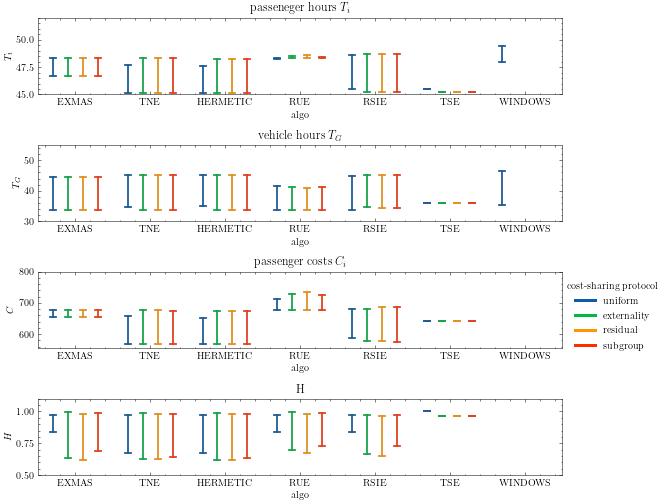

In [100]:
fig, axes = plt.subplots(4,1, figsize = (10,8))
axes = axes.flatten()
titles = ['passeneger hours $T_i$', 'vehicle hours $T_G$', 'passenger costs $C_i$' , 'H']
for i, KPI in enumerate(['$T_i$','$T_G$', '$C$' , '$H$']):
    sns.barplot(y = KPI, x = 'algo', hue = 'pricing', data = KPIs, alpha = 0, ci = 100, capsize = 0.08, ax = axes[i])
    #sns.stripplot(y = KPI, x = 'algo', hue = 'pricing', data = KPIs[KPIs.minmax == 'min'], marker = 'v',ax = axes[i])
    #sns.barplot(y = KPI, x = 'algo', hue = 'pricing', data = KPIs[KPIs.minmax == 'min'], alpha = 1, ci = 100, capsize = 0.05, ax = axes[i])

    axes[i].get_legend().remove()
    axes[i].set_title(titles[i])
    patches = axes[i].patches
    capsize = .1
    lines_per_err = 1 if capsize is None else 3

    for i, line in enumerate(axes[i].get_lines()):

        newcolor = patches[i // lines_per_err].get_facecolor()
        line.set_color(newcolor)
        line.set_alpha(1)
axes[0].set_ylim((45,52))
axes[1].set_ylim((30,55))
axes[2].set_ylim((555,800))
axes[3].set_ylim((0.5,1.1))
custom = [Line2D([], [], marker='', color=colors[i], linestyle='-', lw = 3) for i in [0,1,2,3]]

axes[2].legend(custom, ['uniform','externality','residual','subgroup'], loc='upper right',bbox_to_anchor=(1.2, 1), title = 'cost-sharing protocol') 



#connector, caplines, (vertical_lines,) = container.errorbar.lines
#vertical_lines.set_color(colors)
plt.tight_layout(rect=[0, 0.05, 0.95, 0.95])
#plt.savefig('bars.png',dpi=600)

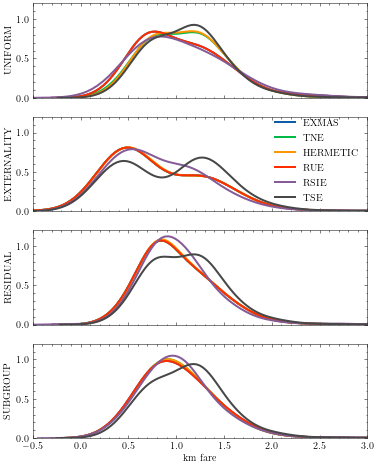

In [52]:
for PRICING in ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']:
    rm['fare_{}'.format(PRICING)] = rm[PRICING]-rm.cost_user
    rm['kmfare {}'.format(PRICING)] = rm['fare_{}'.format(PRICING)]/rm.distance   
EXPERIMENT_NAME = 'res4'
plt.style.use(['science'])
PRICINGS = ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']
fig, axes = plt.subplots(4,1, figsize = (6,8), sharey = True, sharex = True)
axes = axes.flatten()
j=-1
for i,PRICING in enumerate(PRICINGS):
    
    for j, ALGO in enumerate(['EXMAS', 'TNE', 'HERMETIC', 'RUE', 'RSIE', 'TSE']):
        
        col = "Experiment-{}_Pricing-{}_Objective-['total_group_cost']_Pruning-['{}']_minmax-min".format(EXPERIMENT_NAME, PRICING, ALGO)
        to_plot = rm[rm[col] == 1]
        sns.distplot(to_plot['kmfare {}'.format(PRICING)],ax = axes[i], 
                     kde = True, hist = False, label = ALGO, 
                     rug_kws={"alpha":0.2, 'height':0.1, 'lw':2}, 
                     kde_kws={'bw':0.35, 'lw': 2, 'cumulative': False}, 
                     rug = False) 
        axes[i].set_ylabel(PRICING)  
        axes[i].set_xlabel('km fare')  
        
#         to_plot['$\Delta C$']=(to_plot[PRICING]-to_plot['desired_{}'.format(PRICING)])/to_plot['desired_{}'.format(PRICING)]
#         sns.distplot(to_plot['$\Delta C$'],ax = axes[j], kde = True, hist = False, label = PRICING, rug_kws={"alpha":0.2, 'height':0.2, 'lw':2}, kde_kws={'bw':0.05, 'lw': 2, 'cumulative': True}, rug = True) 
        axes[i].set_xlim((-0.5,3))

        #axes[i].set_xscale('log')
        #axes[i].get_legend().remove()
        axes[i].set_ylim((0,1.2))
axes[1].legend()
#plt.savefig('fares.png', dpi = 600)

In [7]:
EXPERIMENT_NAME = 'game_results/res400_4'
KPIs = pd.read_csv('ExMAS/extras/{}_KPIs.csv'.format(EXPERIMENT_NAME), index_col = 0)
rides = pd.read_csv('ExMAS/extras/{}_rides.csv'.format(EXPERIMENT_NAME), index_col = 0)
col = 'indexes'
import json
rides[col] = rides[col].apply(lambda x: json.loads(x))
rm = pd.read_csv('ExMAS/extras/{}_rm.csv'.format(EXPERIMENT_NAME), index_col = [0,1])
EXPERIMENT_NAME = 'res400_4'

In [8]:
import netwulf as nw

In [9]:
requests = pd.DataFrame(index = rm.traveller.unique())

In [10]:
_, config, _ = nw.load("netwulf_config.json") # load config
_, config_schedule, _ = nw.load("netwulf_config_schedule.json") # load config

(2084, 118)


TypeError: 'NoneType' object is not subscriptable

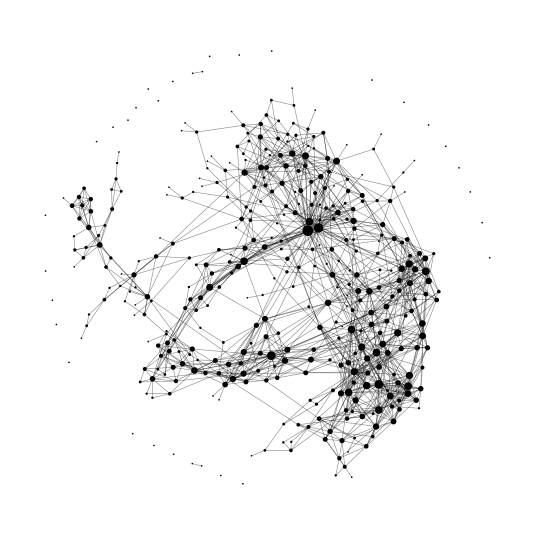

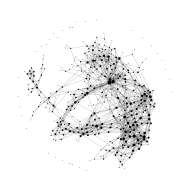

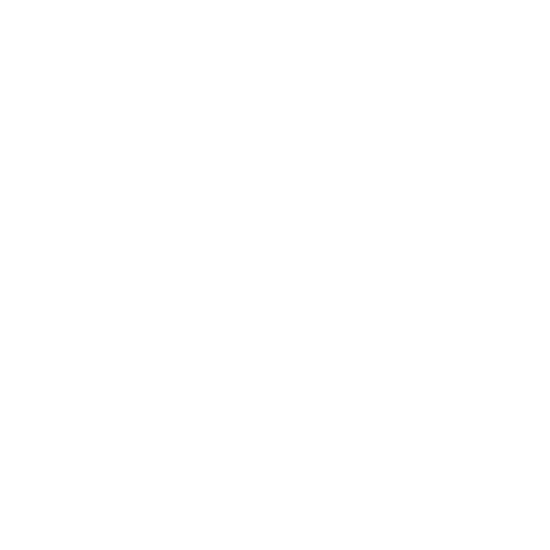

In [11]:
PRICING = 'SUBGROUP'
for algo in ['EXMAS', 'TNE', 'HERMETIC']:
    pruning_column = "pruned_Pricing-{}_Pruning-['{}']".format(PRICING, algo)
    matching_column = "Experiment-{}_Pricing-{}_Objective-['total_group_cost']_Pruning-['{}']_minmax-min".format(EXPERIMENT_NAME,PRICING,algo)
    print(rides[rides[pruning_column]==True].shape)
    fig, ax = plt.subplots(figsize = (10,10))
    G = ExMAS.utils.make_shareability_graph(requests, rides[rides[pruning_column]==True])
    f, _ = nw.visualize(G, config = config)
    _, _ = nw.draw_netwulf(f, fig = fig, ax = ax)
    plt.savefig("g_{}_{}.png".format(algo,'pruning'))
    fig, ax = plt.subplots(figsize = (10,10))
    G = ExMAS.utils.make_shareability_graph(requests, rides[rides[matching_column]==1])
    f, _ = nw.visualize(G, config = config_schedule)
    _, _ = nw.draw_netwulf(f, fig = fig, ax = ax)
    plt.savefig("g_{}_{}.png".format(algo,'matching'))

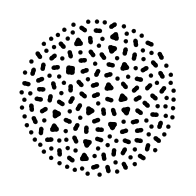

In [240]:
#G = ExMAS.utils.make_shareability_graph(requests, rides[rides[matching_column]==1])
#stylized_network, config_schedule = nw.visualize(G)  # create config
#nw.save("netwulf_config_schedule.json", stylized_network, config_schedule) # save config

In [32]:
os.chdir("/Users/rkucharski/Documents/GitHub/ExMAS")
from IPython.display import display # to display images

g_EXMAS_pruning.png 0 196
g_EXMAS_matching.png 196 196
g_TNE_pruning.png 0 196
g_TNE_matching.png 196 196
g_HERMETIC_pruning.png 0 196
g_HERMETIC_matching.png 196 196


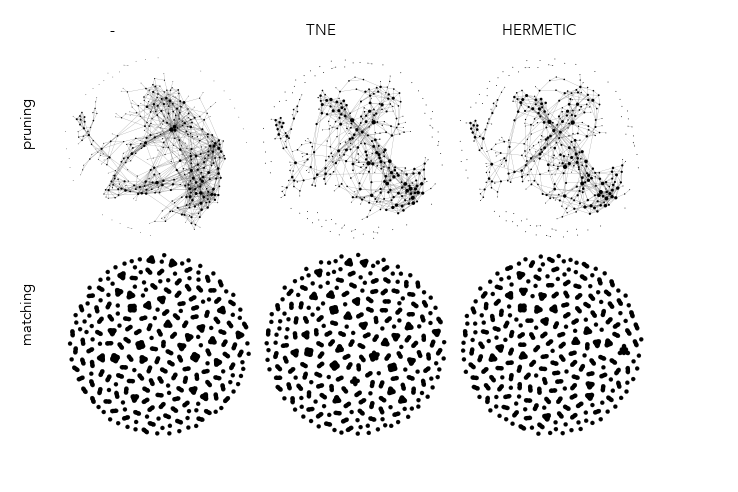

In [34]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw , ImageOps
size = 196
rows = 2
cols = 3
header = 50
col_names = ['EXMAS', 'TNE', 'HERMETIC']
col_titles = ['-', 'TNE', 'HERMETIC']
#names = ['a) PT travel time','b) Uber travel time', 'c) Time Gap', 'd) Cost Gap', 'e) Uber added value' ]
new_im = Image.new('RGB', (size*cols+3*header,size*rows+2*header), (255,255,255))
row_names = ['pruning', 'matching']
font = ImageFont.truetype("Avenir.ttc", 15)
draw = ImageDraw.Draw(new_im) 
for i in range(0,size*cols,size): # kolumny
    shift = 10

    draw.text((int(header)+i+10+50, 20),col_titles[int(i/size)],(0,0,0),font=font)
    for j in range(0,size*rows,size): # wiersze
        
        PATH = 'g_{}_{}.png'.format(col_names[int(i/size)],row_names[int(j/size)])
        #'../data/results/figs/{}_{}_{}_{}.png'.format(file_header, level, CITIES[int(j/size)],  FIELDS[int(i/size)])
        print(PATH, j, size)
        im = Image.open(PATH)
        #im.thumbnail((size*0.99,size*0.99))
        if i == 0:
            txt=Image.new('L', (250,50))
            d = ImageDraw.Draw(txt)
            d.text( (0, 0), row_names[int(j/size)],  font=font, fill=255)
            w=txt.rotate(90,  expand=1)
            new_im.paste( ImageOps.colorize(w, (0,0,0), (0,0,0)), (int(header/3),j-100),  w)
        new_im.paste(im, (header+i+int(size/100)+shift,header+j+int(size/100)))
#         im = Image.open('../data/results/figs/scale_1.png')
#         im.thumbnail((size*0.8,header))
#         new_im.paste(im, (400,3*size+header))
#         im = Image.open('../data/results/figs/scale_2.png')
#         im.thumbnail((size*0.8,header))
#         new_im.paste(im, (header+1400,3*size+header))
#         im = Image.open('../data/results/figs/scale_3.png')
#         im.thumbnail((size*0.8,header))
#         new_im.paste(im, (header+2150,3*size+header))
new_im.save('grafs.jpg', quality=100)

display(new_im)       

---
(c) Rafał Kucharski, Delft, 2020